In [ ]:
import warnings
import pandas as pd
warnings.filterwarnings("ignore")
import logging
logging.disable(logging.CRITICAL)

In [ ]:
!pip install tensorflow

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
df = pd.read_csv('/content/drive/MyDrive/UU/BNB-USD (BaoCao).csv')
df = df.groupby('Date').sum()

In [14]:
!pip install keras

In [15]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-01,10.356931,11.607489,10.325634,11.393217,11.393217,117838677
2019-03-02,11.384693,11.915753,10.960816,11.869744,11.869744,120807894
2019-03-03,11.845305,11.964979,11.352064,11.537903,11.537903,89868246
2019-03-04,11.538013,11.599405,11.070543,11.545945,11.545945,89421231
2019-03-05,11.520388,13.841443,11.520388,13.811967,13.811967,237026335
...,...,...,...,...,...,...
2024-05-28,603.526428,604.985107,593.716187,601.213257,601.213257,1852329404
2024-05-29,601.213257,602.931519,592.966614,594.972046,594.972046,1642696946
2024-05-30,594.972534,601.665039,586.557678,595.026794,595.026794,1737524745


In [18]:
import numpy as np
data = df[['Close']]
# Convert the dataframe to a numpy array
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .9 ))
dataset

array([[ 11.393217],
       [ 11.869744],
       [ 11.537903],
       ...,
       [595.026794],
       [593.522339],
       [601.304199]])

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00301242],
       [0.0037276 ],
       [0.00322957],
       ...,
       [0.87894713],
       [0.8766892 ],
       [0.88836845]])

In [20]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

# we use 60 days ahead for forecasting range
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00301242, 0.0037276 , 0.00322957, 0.00324163, 0.00664255,
       0.0077021 , 0.00864453, 0.00747546, 0.00777404, 0.00766682,
       0.0076968 , 0.00903512, 0.00859837, 0.00850228, 0.0085413 ,
       0.01010503, 0.00956793, 0.00944917, 0.00946655, 0.00884585,
       0.00770127, 0.00882544, 0.00877977, 0.01185552, 0.01118862,
       0.01043019, 0.01109908, 0.01113508, 0.01069205, 0.01132551,
       0.01203008, 0.01285379, 0.01561423, 0.01405829, 0.01464306,
       0.01510948, 0.01460244, 0.0145944 , 0.01309872, 0.01358101,
       0.01330115, 0.01247855, 0.01357984, 0.01400837, 0.01516734,
       0.01503288, 0.01567077, 0.01533443, 0.01898914, 0.02264637,
       0.02344518, 0.02222396, 0.02179514, 0.02024651, 0.02062593,
       0.01929626, 0.02023626, 0.01944406, 0.02028115, 0.01848875])]
[0.01912325324112618]

[array([0.00301242, 0.0037276 , 0.00322957, 0.00324163, 0.00664255,
       0.0077021 , 0.00864453, 0.00747546, 0.00777404, 0.00766682,
       0.0076968 , 0.00903512, 0.00

<Axes: xlabel='Date'>

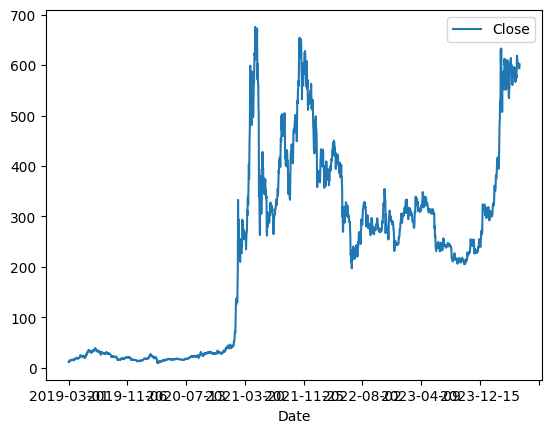

In [21]:
data.plot()

In [22]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)


1668/1668 [==============================] - 115s 67ms/step - loss: 0.0023


In [26]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test)

6/6 [==============================] - 1s 34ms/step


In [27]:
# Inverse scaling to get predictions in original scale
predictions = scaler.inverse_transform(predictions)

In [28]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

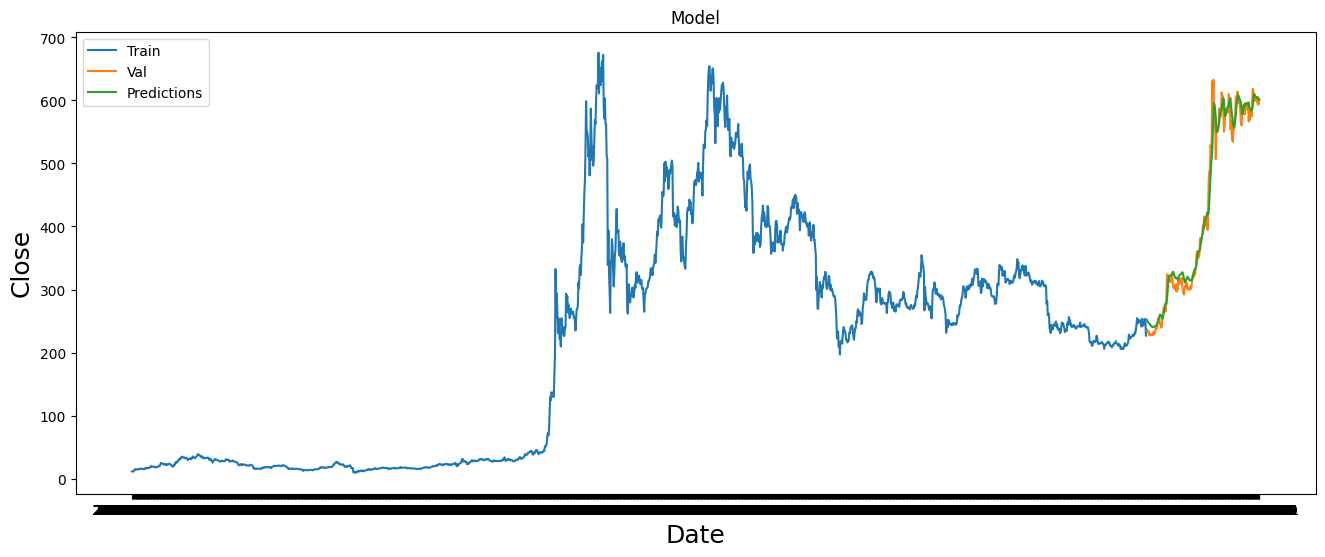

In [29]:
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper left')
plt.show()